In [1]:
import random
import numpy as np
from sklearn.model_selection import train_test_split
import operator as op

In [2]:
class Cell:
    def __init__(self):
        self.Ra = random.gauss(1,0.01)
        self.Rb = random.gauss(1,0.01)
        self.Rc = random.gauss(1,0.01)
        self.Rd = random.gauss(1,0.01)
    def cellTimeCounter(self, byte):
        if byte == 1:
            return self.Ra,self.Rd
        if byte == 0:
            return self.Rb,self.Rc

In [3]:
cells_num = 128
chain = [Cell() for i in range(cells_num)]
chain2 = [Cell() for i in range(cells_num)]
chain3 = [Cell() for i in range(cells_num)]
chain4 = [Cell() for i in range(cells_num)]

In [4]:
def evaluator(chain, byte_arr):
    time_top = 0
    time_bottom = 0
    for i in range(cells_num):
        time_top += chain[i].cellTimeCounter(byte_arr[i])[0]
        time_bottom += chain[i].cellTimeCounter(byte_arr[i])[1]
    delta = time_top - time_bottom
    if delta > 0:
        return 1
    else:
        return 0

In [5]:
data = []
labels = []
size = 100000
for i in range(size):
    C = [random.randint(0,1) for x in range(cells_num)]
    for byte in C:
        data.append(byte)
    out1 = op.xor(evaluator(chain,C), evaluator(chain2,C))
    out2 = op.xor(evaluator(chain3,C), evaluator(chain4,C))
    labels.append(op.xor(out1,out2))
X = np.asarray(data).reshape(size,cells_num)
y = np.asarray(labels)

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.56416


In [8]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [10]:
def create_baseline():
    model = Sequential()
    model.add(Dense(100, input_dim=cells_num, activation='relu'))
    model.add(Dense(60, input_dim=100, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [11]:
import progressbar

In [12]:
bar = progressbar.ProgressBar(maxval=10.0, widgets=[
    'SYSTEM HACKING: ',
    progressbar.Bar(left='[', marker='♬', right=']'),
    progressbar.Percentage(),
])

In [13]:
epoches = []
train_accs = []
test_accs = []
losses = []
model = create_baseline()
bar.start()

for epoch in range(10):
    epoches.append(epoch)
    bar.update(epoch)
    history = model.fit(X_train, y_train, epochs = 1, validation_split = 0, verbose = 0)
    train_accs.append(history.history['accuracy'])
    losses.append(history.history['loss'])
    ev = model.evaluate(X_test,y_test, verbose = 0)
    
    test_accs.append(ev[1])
    if(ev[1] <= 0.95*max(test_accs)):
        break
bar.finish()        
print("SYSTEM HACKED WITH ACCURACY", test_accs[-1])

SYSTEM HACKED WITH ACCURACY 0.9029600024223328


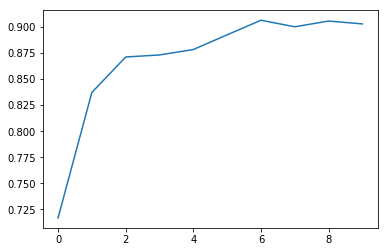

In [14]:
plt.plot(epoches, test_accs)

In [15]:
# Check linear model

In [16]:
cells_num = 256
ch = []
for i in range(0, 10):
    ch.append([Cell() for j in range(cells_num)])

In [17]:
def get_logreg_acc(n):
    data = []
    labels = []
    size = 10000
    for i in range(size):
        C = [random.randint(0,1) for x in range(cells_num)]
        for byte in C:
            data.append(byte)
        
        out = evaluator(ch[0], C)
        if n > 0 and n < 10:
            for j in range(1, n):
                out = op.xor(out, evaluator(ch[j], C))
        elif n != 0:
            print("Error\n")

        labels.append(out)
    X = np.asarray(data).reshape(size,cells_num)
    y = np.asarray(labels)
    
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
    logreg = LogisticRegression(solver='lbfgs')
    logreg.fit(X_train,y_train)
    y_pred=logreg.predict(X_test)
    #print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    return metrics.accuracy_score(y_test, y_pred)

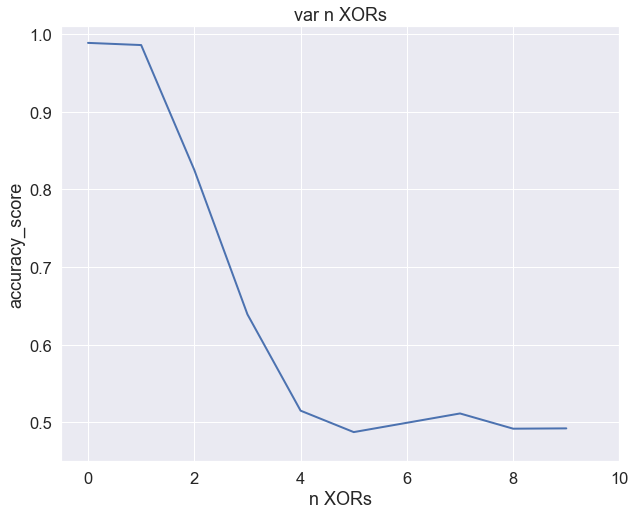

In [19]:
cells_num = 128
x1 = []
y1 = []

from tqdm import tqdm_notebook as load

for i in load(range(0, 10)):
    x1.append(i)
    y1.append(get_logreg_acc(i))
    
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
plt.plot(x1, y1, lw=2)
plt.xlim([-0.5, 10])
plt.ylim([0.45, 1.01])
plt.xlabel('n XORs')
plt.ylabel('accuracy_score')
plt.title('var n XORs')
plt.show()    

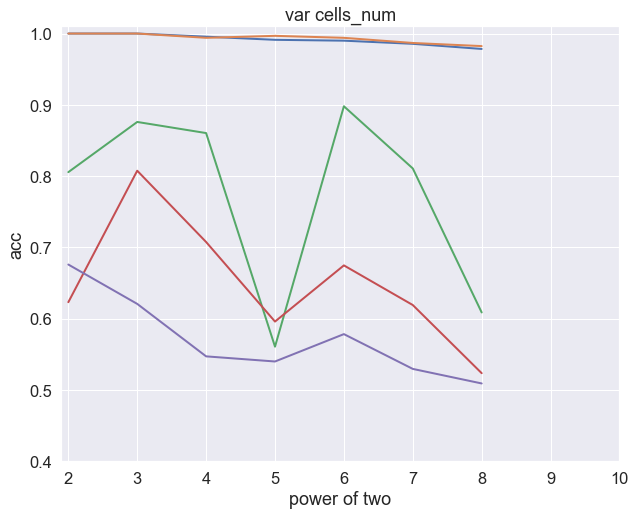

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import math


sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
plt.xlim([1.9, 10])
plt.ylim([0.4, 1.01])

x1 = []
y1 = []

for i in load(range(0, 5)):
    for j in range(2, 9):
        cells_num = 2**j
        x1.append(j)
        y1.append(get_logreg_acc(i))
    plt.plot(x1, y1, lw=2, label=i)
    x1 = []
    y1 = []
    
plt.xlabel('power of two')
plt.ylabel('acc')
plt.title('var cells_num')
plt.show()  

In [21]:
def modified_evaluator(chain, byte_arr):
    time_top = 0
    time_bottom = 0
    for i in range(cells_num):
        time_top += chain[i].cellTimeCounter(byte_arr[i])[0]
        time_bottom += chain[i].cellTimeCounter(byte_arr[i])[1]
    delta = time_top - time_bottom
    return delta

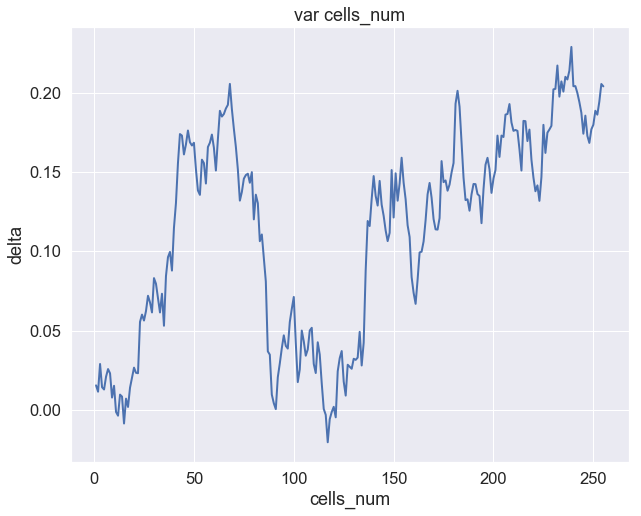

In [22]:
cells_num = 256
C = [random.randint(0,1) for x in range(cells_num)]
chain = [Cell() for i in range(cells_num)]

x2 = []
y2 = []

for i in load(range(1, 256)):
    cells_num = i
    x2.append(i)
    y2.append(modified_evaluator(chain, C))
    
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
plt.plot(x2, y2, lw=2)
plt.xlabel('cells_num')
plt.ylabel('delta')
plt.title('var cells_num')
plt.show()  

In [24]:
## нейрон очка

In [25]:
cells_num = 256
ch = []
for i in range(0, 10):
    ch.append([Cell() for j in range(cells_num)])

In [26]:
def create_baseline():
    model = Sequential()
    model.add(Dense(100, input_dim=cells_num, activation='relu'))
    model.add(Dense(60, input_dim=100, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [27]:
def get_dp_acc(n, m_size):
    data = []
    labels = []
    size = m_size
    for i in range(size):
        C = [random.randint(0,1) for x in range(cells_num)]
        for byte in C:
            data.append(byte)
        
        out = evaluator(ch[0], C)
        if n > 0 and n < 10:
            for j in range(1, n):
                out = op.xor(out, evaluator(ch[j], C))
        elif n != 0:
            print("Error\n")

        labels.append(out)
    X = np.asarray(data).reshape(size,cells_num)
    y = np.asarray(labels)
    
    epoches = []
    train_accs = []
    test_accs = []
    losses = []
    model = create_baseline()

    for epoch in load(range(10)):
        epoches.append(epoch)
        history = model.fit(X_train, y_train, epochs = 1, validation_split = 0, verbose = 0)
        train_accs.append(history.history['accuracy'])
        losses.append(history.history['loss'])
        ev = model.evaluate(X_test,y_test, verbose = 0)
    
        test_accs.append(ev[1])
        if(ev[1] <= 0.95*max(test_accs)):
            return epoches, test_accs
        
    return epoches, test_accs

In [28]:
cells_num = 128

x3 = []

for i in load(range(0, 8)):
    x3.append(get_dp_acc(i, 10000))
    

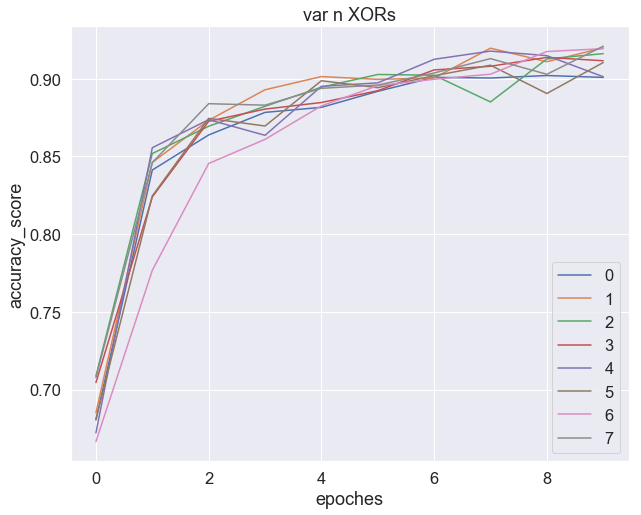

In [29]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

l = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]

plt.figure(figsize=(10, 8))
for i in range(0,8):
    plt.plot(x3[i][0], x3[i][1], label=l[i])
plt.xlabel('epoches')
plt.ylabel('accuracy_score')
plt.title('var n XORs')
plt.legend(loc='lower right')
plt.show()

In [30]:
cells_num = 128

x3 = []
for i in load(range(1, 11)):
    x3.append(get_dp_acc(4, 10000*i))
    

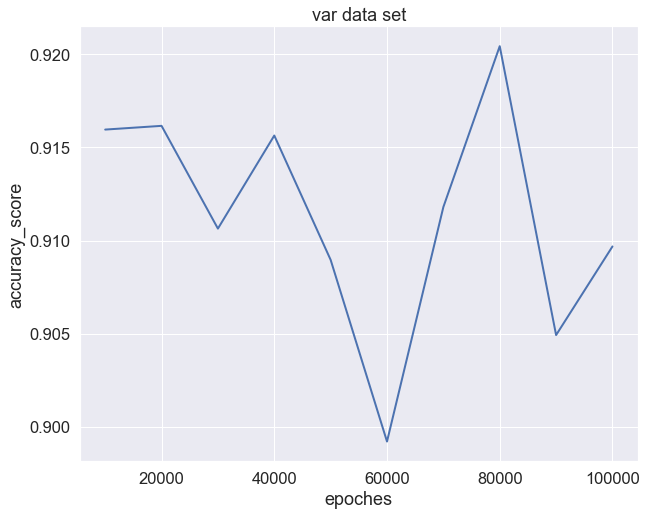

In [31]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

x4=[]
y4=[]

plt.figure(figsize=(10, 8))
for i in range(1,11):
    x4.append(10000*i)
    y4.append(x3[i-1][1][-1])
plt.plot(x4, y4, lw=2)
plt.xlabel('epoches')
plt.ylabel('accuracy_score')
plt.title('var data set')
#plt.legend(loc='lower right')
plt.show()

In [10]:
from os import listdir
from os.path import isfile, join
import numpy as np
path = "aist_puf_dataset_ver1_0/"
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
PUFs = []
for n in onlyfiles:
    f = open(path + n, "r")
    a = np.fromfile(f, dtype=np.uint8)
    tmpBit = np.zeros((8, 2 * 1024 * 1024))
    for i in range(8):
        tmpBit[i] = a[(8 - i - 1) * (2 * 1024 * 1024): (8 - i) * 2 * 1024 * 1024]
    tmp2 = tmpBit.reshape(16, 1024, 1024)
    PUFres = np.transpose(tmp2, (2, 0, 1))
    avgPUF = PUFres.sum(0) / 1024
    PUFs.append(avgPUF.astype(int))

## Here we got our PUFs mazafacka

In [11]:
for puf in PUFs:
    print(puf.min(), puf.max())

136 144
140 148
139 147
136 145
140 148
139 148
138 147
131 138
139 147
138 146
137 147
138 147
138 146
136 146
140 147
139 149
135 144
137 145
139 149
137 146
139 146
133 142
134 143
139 147
139 147
140 149
139 148
137 147
137 144
137 146
142 152
143 152
139 147
138 147
140 147
138 148
138 146
141 148
140 148
137 146
138 146
138 146
136 144
138 147
135 145


In [12]:
import random
class TurboPUF:
    def __init__(self, min_, max_):
        self.min = min_
        self.max = max_
    def get(self, inp):
        random.seed(inp)
        
        delay = append(random.gauss((self.min + self.max) / 2, 3))
        if delay > (self.min + self.max) / 2:
            res = 1
        else:
            res = 0
        return res, int(delay)

In [89]:
for i in range (30):
    print(int(random.gauss((136 + 144) / 2, 3)))

140
144
140
143
143
137
144
139
139
143
144
139
143
138
142
141
141
135
141
134
142
137
138
138
142
136
142
135
138
146


In [14]:
turbopufs = []
for i in range(len(PUFs)):
    turbopufs.append(TurboPUF(PUFs[i].min(), PUFs[i].max()))

## 45 Fully armored PUFs are ready to destroy